In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import cv2
import time
import urllib.request

In [ ]:
import zipfile
import os

zip_path = "/content/datasettt.zip"
extract_folder = "/content/unzipped_folder"

# Check if the zip file exists
if os.path.exists(zip_path):
    try:
        # Print actual path to debug
        print(f"Found ZIP at: {zip_path}")

        # Create extraction folder if it doesn't exist
        os.makedirs(extract_folder, exist_ok=True)

        # Extract contents
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)

        print(f"Files extracted successfully to: {extract_folder}")

        # List extracted files for verification
        print("Extracted files:")
        for root, dirs, files in os.walk(extract_folder):
            for file in files:
                print(os.path.join(root, file))

    except zipfile.BadZipFile:
        print("The file is not a zip file or it is corrupted.")
    except Exception as e:
        print(f"An error occurred: {e}")
else:
    print(f"The zip file at {zip_path} does not exist.")


Found ZIP at: /content/datasettt.zip
The file is not a zip file or it is corrupted.


In [ ]:
!file "/content/dl_dataset (2).zip"


/content/dl_dataset (2).zip: Zip archive data, at least v2.0 to extract, compression method=store


In [ ]:
with open("/content/dl_dataset (2).zip", "rb") as f:
    print(f.read(4))


b'PK\x03\x04'


In [ ]:
import zipfile

zip_path = "/content/dl_dataset (2).zip"

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        # Check if it's a valid ZIP file by testing file validity
        bad_files = zip_ref.testzip()
        if bad_files:
            print(f"ZIP file is corrupted. Problematic file: {bad_files}")
        else:
            print("ZIP file is valid.")
except zipfile.BadZipFile:
    print("This is not a valid ZIP file.")
except Exception as e:
    print(f"Error: {e}")


ZIP file is valid.


In [ ]:
import zipfile
import os

zip_path = "/content/dl_dataset (2).zip"
extract_folder = "/content/unzipped_folder"

# Ensure the zip file exists
if os.path.exists(zip_path):
    try:
        # Create the extraction folder if it doesn't exist
        if not os.path.exists(extract_folder):
            os.makedirs(extract_folder)

        # Extract the contents
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
            print(f"Files extracted successfully to {extract_folder}")

            # List all files extracted
            extracted_files = os.listdir(extract_folder)
            print("Extracted files:", extracted_files)
    except Exception as e:
        print(f"Error during extraction: {e}")
else:
    print(f"The zip file at {zip_path} does not exist.")


Files extracted successfully to /content/unzipped_folder
Extracted files: ['dl_dataset']


In [ ]:
def read_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)
    return image

def plot_url_pic(x):
    image_url = x

    with urllib.request.urlopen(image_url) as url:
        s = url.read()

    arr = np.asarray(bytearray(s), dtype=np.uint8)
    image = cv2.imdecode(arr, -1)

    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

def img_to_arr(x):
    img = cv2.imread(x)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img,(64,64))
    return img

In [ ]:
import pandas as pd

# Reading an Excel file
df = pd.read_excel("/content/unzipped_folder/dl_dataset/help.xlsx")

# Display the first few rows
df.head()


,image,label
0,Dataset 1-01,1
1,Dataset 1-02,1
2,Dataset 1-03,1
3,Dataset 1-04,1
4,Dataset 1-05,2


In [ ]:
df['image']

,image
0,Dataset 1-01
1,Dataset 1-02
2,Dataset 1-03
3,Dataset 1-04
4,Dataset 1-05
5,Dataset 1-06
6,Dataset 1-07
7,Dataset 1-08
8,Dataset 1-09
9,Dataset 1-10


In [ ]:
df['image'] = "/content/unzipped_folder/" + df['image'].astype(str)
df.head()

,image,label
0,/content/unzipped_folder/Dataset 1-01,1
1,/content/unzipped_folder/Dataset 1-02,1
2,/content/unzipped_folder/Dataset 1-03,1
3,/content/unzipped_folder/Dataset 1-04,1
4,/content/unzipped_folder/Dataset 1-05,2


In [ ]:
df['image'][0]

'/content/unzipped_folder/Dataset 1-01'

In [ ]:
print(img_to_arr(df['image'][1]).shape)
plt.imshow(img_to_arr(df['image'][0]))

error: OpenCV(4.11.0) /io/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
#df = pd.read_csv("/content/unzipped_folder/english.csv")
df = pd.read_excel("/content/unzipped_folder/dl_dataset/help.xlsx")

# Define the folder where the images are stored
image_folder = "/content/unzipped_folder/dl_dataset"  # Make sure this is correct

# Function to convert image to array
def img_to_arr(image_filename):
    # Create the full image path
    image_path = os.path.join(image_folder, image_filename)

    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Error: File does not exist at path {image_path}")
        return None

    # Read the image
    img = cv2.imread(image_path)

    # Check if image is read properly
    if img is None:
        print(f"Error: Failed to load image at path {image_path}")
        return None

    # Convert to grayscale and resize
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))  # Resize to 64x64
    return img

# Example usage: Get the first image and label
image_filename = df['image'][0]
image_arr = img_to_arr(image_filename)

# Display the image if it was successfully loaded
if image_arr is not None:
    print(image_arr.shape)
    plt.imshow(image_arr, cmap='gray')
    plt.show()
else:
    print("Could not load image.")


Error: File does not exist at path /content/unzipped_folder/dl_dataset/Dataset 1-01
Could not load image.


In [ ]:
import os

# List all files in the 'dl_dataset' folder to verify the filenames
dataset_folder = "/content/unzipped_folder/dl_dataset"
files = os.listdir(dataset_folder)
print(files)  # This will show all filenames in the folder


['help.xlsx', 'Dataset']


In [ ]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Define the folder paths
image_folder = "/content/unzipped_folder/dl_dataset/Dataset"  # Path to the images folder
excel_file = "/content/unzipped_folder/dl_dataset/help.xlsx"  # Path to the Excel file

# Load the Excel file into a DataFrame
df = pd.read_excel("/content/unzipped_folder/dl_dataset/help.xlsx")

# Check the first few rows of the DataFrame to understand its structure
print(df.head())

# Function to convert image to array
def img_to_arr(image_filename):
    # Create the full image path
    image_path = os.path.join(image_folder, image_filename)

    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Error: File does not exist at path {image_path}")
        return None

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image is read properly
    if img is None:
        print(f"Error: Failed to load image at path {image_path}")
        return None

    # Convert to grayscale and resize
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))  # Resize to 64x64
    return img

# Example usage: Get the first image and label
image_filename = df['image'][0]  # Assuming 'image' column has filenames
image_arr = img_to_arr(image_filename)

# Display the image if it was successfully loaded
if image_arr is not None:
    print(image_arr.shape)
    plt.imshow(image_arr, cmap='gray')
    plt.show()
else:
    print("Could not load image.")


          image  label
0  Dataset 1-01      1
1  Dataset 1-02      1
2  Dataset 1-03      1
3  Dataset 1-04      1
4  Dataset 1-05      2
Error: File does not exist at path /content/unzipped_folder/dl_dataset/Dataset/Dataset 1-01
Could not load image.


          image  label
0  Dataset 1-01      1
1  Dataset 1-02      1
2  Dataset 1-03      1
3  Dataset 1-04      1
4  Dataset 1-05      2
(64, 64)


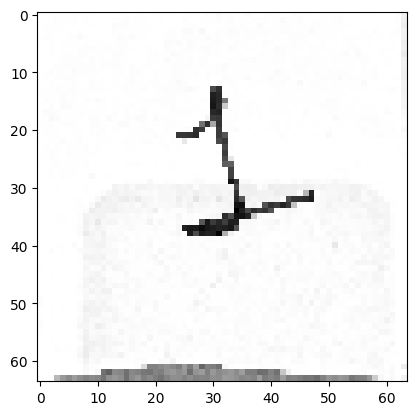

In [ ]:
import os
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Define the folder paths
image_folder = "/content/unzipped_folder/dl_dataset/Dataset"  # Path to the 'Dataset' folder
excel_file = "/content/unzipped_folder/dl_dataset/help.xlsx"  # Path to the Excel file

# Load the Excel file into a DataFrame
df = pd.read_excel(excel_file)

# Check the first few rows of the DataFrame to understand its structure
print(df.head())

# Function to convert image to array
def img_to_arr(image_filename):
    # Create the full image path, including the 'Dataset' subfolder
    image_path = os.path.join(image_folder, image_filename + '.png')  # Add extension if necessary

    # Check if the image exists
    if not os.path.exists(image_path):
        print(f"Error: File does not exist at path {image_path}")
        return None

    # Read the image
    img = cv2.imread(image_path)

    # Check if the image is read properly
    if img is None:
        print(f"Error: Failed to load image at path {image_path}")
        return None

    # Convert to grayscale and resize
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))  # Resize to 64x64
    return img

# Example usage: Get the first image and label
image_filename = df['image'][0]  # Assuming 'image' column has filenames
image_arr = img_to_arr(image_filename)

# Display the image if it was successfully loaded
if image_arr is not None:
    print(image_arr.shape)
    plt.imshow(image_arr, cmap='gray')
    plt.show()
else:
    print("Could not load image.")


In [ ]:
start_time = time.time()
import multiprocessing

with multiprocessing.Pool(4) as p:
    images = p.map(img_to_arr, df['image'])
end_time = time.time()
print("with multiprocessing:", end_time-start_time)

with multiprocessing: 2.7692644596099854


In [ ]:
images = images.reshape(24, 64, 64, 1)
x.shape

AttributeError: 'list' object has no attribute 'reshape'

In [ ]:
import numpy as np

# Assuming images is the list of images you've loaded
print(np.array(images).shape)


(24, 64, 64)


In [ ]:
x = np.array(images).reshape(24, 64, 64,1)
x.shape

(24, 64, 64, 1)

3


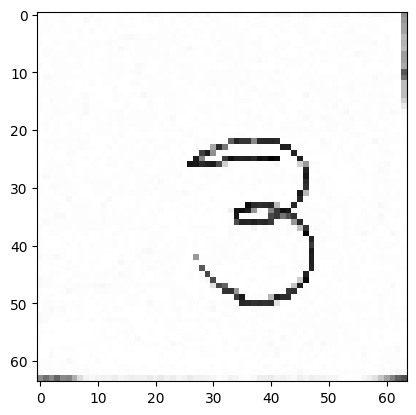

In [ ]:
img = x[11].reshape((64,64))
plt.imshow(img,cmap='gray')
print(df['label'].iloc[11])

In [ ]:
import numpy as np

# Assuming 'images' is a list of images with shape (24, 64, 64)
images = np.array(images)

# Reshape to (24, 64, 64, 1) for grayscale images
images = images.reshape(24, 64, 64, 1)

# Verify the shape
print(images.shape)


(24, 64, 64, 1)


In [ ]:
y = df['label']
le = LabelEncoder()
y_label = le.fit_transform(y)

In [ ]:
train_images,test_images,train_labels,test_labels = train_test_split(x,y_label,test_size=0.2,random_state=42)
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
model = Sequential()
model.add(Conv2D(512,(5,5),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu',input_shape=(64,64,1)))
model.add(MaxPool2D(2,2))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='sigmoid'))
model.add(Dense(62,activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=20,validation_data = (test_images,test_labels))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.0000e+00 - loss: 4.6250 - val_accuracy: 0.0000e+00 - val_loss: 3.7607
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.0000e+00 - loss: 3.9890 - val_accuracy: 0.6000 - val_loss: 1.6731
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.3684 - loss: 2.1984 - val_accuracy: 0.6000 - val_loss: 1.3419
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3684 - loss: 1.7619 - val_accuracy: 0.2000 - val_loss: 1.9841
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.2632 - loss: 1.8347 - val_accuracy: 0.2000 - val_loss: 1.5955
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.2632 - loss: 1.6045 - val_accuracy: 0.2000 - val_loss: 1.4764
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2632 - loss: 1.5445 - val_accuracy: 0.2000 - val_loss: 1.5305
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.2632 - loss: 1.5256 - val_accuracy: 0.6000 - val_loss: 1.4545
Epoc

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 60, 60, 512)    │        13,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 30, 30, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 256)    │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 62)             │        15,934 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,099,324 (88.12 MB)

 Trainable params: 7,699,774 (29.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 15,399,550 (58.74 MB)

In [ ]:
predicted_labels = le.inverse_transform(model.predict(test_images).argmax(axis=1))
actual_labels = le.inverse_transform(test_labels)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 319ms/step


In [ ]:
print('predicted label is ;',predicted_labels[2])
print('Actual Label is :',actual_labels[2])

predicted label is ; 3
Actual Label is : 1


printed label : 3
actual label : 3


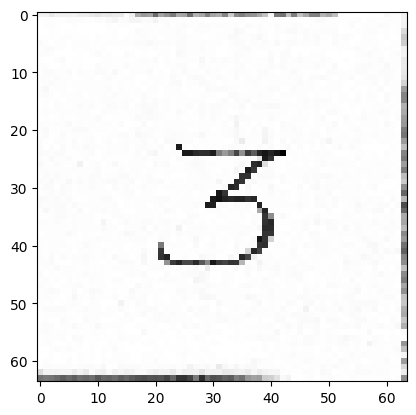

In [ ]:
# number of image to be predicted
# change the value of I
i = 3



plt.imshow(test_images[i],cmap='gray')
print('printed label :',predicted_labels[i])
print('actual label :', actual_labels[i])

In [ ]:
import pandas as pd

# Update the path if necessary
df = pd.read_excel("/content/unzipped_folder/dl_dataset/help.xlsx")

# Confirm updated rows
print("Number of entries in Excel:", len(df))


Number of entries in Excel: 24


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


y_pred = model.predict(test_images)
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
accuracy = accuracy_score(test_labels, y_pred_labels)
precision = precision_score(test_labels, y_pred_labels, average='weighted')
recall = recall_score(test_labels, y_pred_labels, average='weighted')
f1 = f1_score(test_labels, y_pred_labels, average='weighted')
confusion_mat = confusion_matrix(test_labels, y_pred_labels)

# Print or use the evaluation metrics as needed
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(confusion_mat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
Accuracy: 0.6
Precision: 0.36
Recall: 0.6
F1 Score: 0.45
Confusion Matrix:
[[0 0 1]
 [0 0 1]
 [0 0 3]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

# Function to convert image to array
def img_to_arr(x):
    if not os.path.exists(x):  # Check if the file exists
        print(f"Error: File does not exist at path {x}")
        return None
    img = cv2.imread(x)
    if img is None:  # Check if image is loaded properly
        print(f"Error: Failed to load image at path {x}")
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (64, 64))
    return img

# Example usage
image_path = df['image'][0]
image_arr = img_to_arr(image_path)

if image_arr is not None:
    print(image_arr.shape)
    plt.imshow(image_arr, cmap='gray')
    plt.show()
else:
    print("Could not load image.")


Error: File does not exist at path /content/unzipped_folder/Dataset 1-01
Could not load image.


In [ ]:
import zipfile
import os

zip_path = "/content/dl_dataset (2).zip"
extract_folder = "/content/unzipped_folder"

# Ensure the zip file exists
if os.path.exists(zip_path):
    try:
        # Create the extraction folder if it doesn't exist
        if not os.path.exists(extract_folder):
            os.makedirs(extract_folder)

        # Extract the contents
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_folder)
        print(f"Files extracted successfully to {extract_folder}")
    except Exception as e:
        print(f"Error during extraction: {e}")
else:
    print(f"The zip file at {zip_path} does not exist.")


Error during extraction: File is not a zip file
